In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# Read dataset

In [13]:
data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: title={'center': 'Species'}>

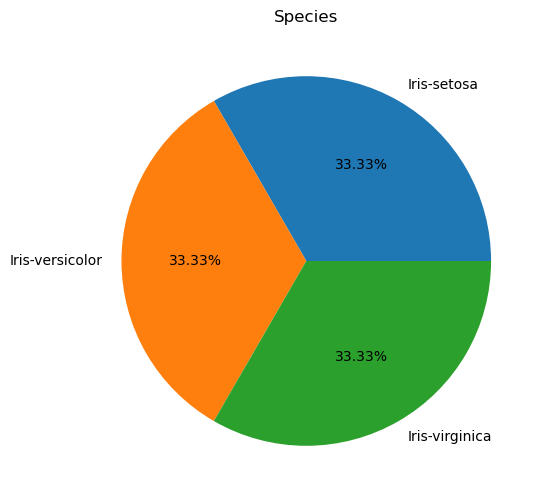

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,6))
data['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(data["species"])
data["species"] = labelencoder.transform(data["species"])
data["species"] = data["species"].astype(int)
data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Split data into 75% for training and 25% for testing

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(["species"] , axis = 1)
Y = data["species"]
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 42)
x_train[:5]

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


# Naive Bayes model

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)
yHat = model.predict(x_test)
#print(model.score(x_test,y_test))

print(f"Accuracy score: {accuracy_score(y_test,yHat)*100}%" )

Accuracy score: 100.0%


In [19]:
print(labelencoder.classes_)
print(labelencoder.classes_[0])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa


# Prediction

In [20]:
def predict(model , data):
    out = model.predict(data)
    p = labelencoder.classes_[out]
    return p
di = {}
di["sepal_length"] = float(input("sepal length:  "))
di["sepal_width"] = float(input("sepal width:  "))
di["petal_length"] = float(input("petal length:  "))
di["petal_width"] = float(input("petal width:  "))

df = pd.DataFrame(di , index = [0])
print(f"predicted value: {predict(model ,df )} ")

sepal length:   5.1
sepal width:   3.5
petal length:   1.4
petal width:   0.2


predicted value: ['Iris-setosa'] 
